# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [2]:
df = pd.read_csv('/home/madhu/Downloads/Udemy/A-Z ML udemy/Machine+Learning+A-Z+(Codes+and+Datasets)/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/Python/Ads_CTR_Optimisation.csv')

In [3]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


## Implementing UCB

In [5]:
import math
N = 500
d = 10
ads_selected = []
numbers_of_selection = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if numbers_of_selection[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selection[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selection[ad] += 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Visualising the results

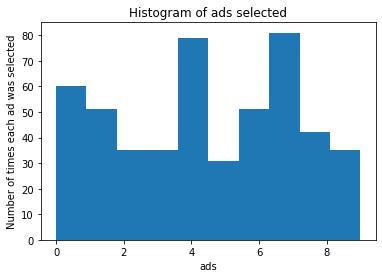

In [6]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("ads")
plt.ylabel("Number of times each ad was selected")
plt.show()